In [7]:
import pandas as pd
from pathlib import Path

In [11]:
# Definindo o caminho da pasta dataset
dataset_path = "dataset"

# Lista para armazenar os dataframes
dataframes = []

# Iterando sobre todos os arquivos CSV na pasta
for file in Path(dataset_path).glob('*.csv'):
    try:
        # Lendo cada arquivo CSV
        df = pd.read_csv(file, sep=';')
        # Adicionando o nome do arquivo como uma coluna (opcional)
        df['source_file'] = file.name
        # Adicionando o dataframe à lista
        dataframes.append(df)
        print(f"Arquivo {file.name} importado com sucesso")
    except Exception as e:
        print(f"Erro ao importar {file.name}: {str(e)}")

# Combinando todos os dataframes (opcional)
# Se os CSVs tiverem a mesma estrutura, você pode combinar em um único dataframe
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    print("\nTodos os arquivos foram combinados em um único dataframe")
    print(f"Dimensões do dataframe final: {combined_df.shape}")

Arquivo dados_cronicas_ses_2022.csv importado com sucesso
Arquivo dados_cronicas_ses_2024.csv importado com sucesso
Arquivo dados_cronicas_ses_2023.csv importado com sucesso

Todos os arquivos foram combinados em um único dataframe
Dimensões do dataframe final: (243940, 13)


# Descrição do Dataset

**Nome do Dataset:** Óbitos por Doenças Crônicas Não Transmissíveis (DCNT) – Brasil

**Descrição do tema e finalidade:** 
    O objetivo principal do dataset é disponibilizar informações padronizadas e qualificadas sobre mortalidade por **Doenças Crônicas Não Transmissíveis (DCNT)** no Brasil, permitindo:
    
    - O monitoramento da evolução temporal das DCNT;  
    - A análise do perfil epidemiológico da população afetada;  
    - O suporte à formulação de políticas públicas de **prevenção, promoção e cuidado em saúde**.

**Fonte:** Sistema de Informação sobre Mortalidade (SIM) – Ministério da Saúde

**Link de acesso:** [dados.gov.br](https://dados.gov.br/dados/conjuntos-dados/doencas_croninas2) 

**Órgão responsável:** Ministério da Saúde / DATASUS
    
**Número de registros e colunas:** Os dados coletados são dos últimos 5 anos, todos foram combinados em **combined_df**, o dataframe possui [] registros e [] colunas

**Grupos de Doenças Considerados (CID-10)**
    As DCNT, segundo a **10ª Revisão da Classificação Internacional de Doenças (CID-10)**, estão organizadas em quatro grandes grupos:
    
    - **C00–C97 → Neoplasias (tumores malignos)**  
    - **E10–E14 → Diabetes Mellitus**  
    - **I00–I99 → Doenças Cardiovasculares**  
    - **J30–J98 → Doenças Respiratórias Crônicas**
    
**Variáveis principais:**

    - `dt_obito` → Data do óbito  
    - `dt_nascimento` → Data de nascimento do falecido  
    - `nu_idade` → Idade no momento do óbito  
    - `sg_sexo` → Sexo (Masculino/Feminino)  
    - `tp_raca_cor` → Raça/cor declarada  
    - `tp_escolaridade` → Grau de escolaridade  
    - `co_municipio_ibge_residencia` → Município de residência  
    - `co_municipio_ibge_ocorrencia` → Município de ocorrência  
    - `co_cid_causa_basica` → Código da causa básica (CID-10)  
    - `desc_cid_causa_basica` → Descrição da causa básica  
    - `capitulo_cid_causa_basica` → Capítulo do CID-10  
    - `categoria_cid_causa_basica` → Categoria detalhada do CID-10


In [23]:
#Primeros dados
combined_df.head()

,dt_obito,dt_nascimento,nu_idade,sg_sexo,tp_raca_cor,tp_escolaridade,co_municipio_ibge_residencia,co_municipio_ibge_ocorrencia,co_cid_causa_basica,desc_cid_causa_basica,capitulo_cid_causa_basica,categoria_cid_causa_basica,source_file
0,2022-01-01,1942-03-05,"79,0",Feminino,Branca,de 4 a 7 anos,Belo Horizonte,Belo Horizonte,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA,dados_cronicas_ses_2022.csv
1,2022-01-01,1969-08-14,"52,0",Masculino,Branca,de 1 a 3 anos,Itatiaiuçu,Itatiaiuçu,C069,BOCA NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG OUTR PARTES E PARTES NE DA BOCA,dados_cronicas_ses_2022.csv
2,2022-01-01,1947-08-23,"74,0",Masculino,Branca,de 8 a 11 anos,Nanuque,Nanuque,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO,dados_cronicas_ses_2022.csv
3,2022-01-01,1968-07-19,"53,0",Masculino,Parda,de 4 a 7 anos,Ribeirão das Neves,Ribeirão das Neves,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO,dados_cronicas_ses_2022.csv
4,2022-01-01,1946-03-28,"75,0",Feminino,Parda,Ignorado,Belo Horizonte,Belo Horizonte,C169,ESTOMAGO NE,II. NEOPLASIAS (TUMORES),NEOPL MALIG DO ESTOMAGO,dados_cronicas_ses_2022.csv


In [24]:
print("\nTipos de dados:")
print(df.dtypes)


Tipos de dados:
dt_obito                        object
dt_nascimento                   object
nu_idade                        object
sg_sexo                         object
tp_raca_cor                     object
tp_escolaridade                 object
co_municipio_ibge_residencia    object
co_municipio_ibge_ocorrencia    object
co_cid_causa_basica             object
desc_cid_causa_basica           object
capitulo_cid_causa_basica       object
categoria_cid_causa_basica      object
source_file                     object
dtype: object


In [31]:
import re
def to_num(s):
    return pd.to_numeric(
        s.astype(str)
         .str.strip()
         .str.replace(',', '.', regex=False)            # vírgula decimal -> ponto
         .str.replace(r'[^0-9\.\-]', '', regex=True),   # remove qualquer coisa não numérica
        errors='coerce'
    )

combined_df['nu_idade'] = to_num(combined_df['nu_idade'])

serie = combined_df['nu_idade'].dropna()

media_idade    = serie.mean()
mediana_idade  = serie.median()
moda_idade     = serie.mode().iloc[0] if not serie.mode().empty else np.nan
desvio         = serie.std()
variancia      = serie.var()
q1             = serie.quantile(0.25)
q3             = serie.quantile(0.75)
iqr            = q3 - q1

print("Média da idade:", media_idade)
print("Mediana da idade:", mediana_idade)
print("Moda da idade:", moda_idade)
print("Desvio padrão:", desvio)
print("Variância:", variancia)
print("Q1:", q1, "Q3:", q3, "IQR:", iqr)

# Valores ausentes
print("\nValores ausentes por coluna:")
print(combined_df.isnull().sum())

Média da idade: 71.74255879169536
Mediana da idade: 73.0
Moda da idade: 75.0
Desvio padrão: 15.126963349200013
Variância: 228.82502016804045
Q1: 63.0 Q3: 83.0 IQR: 20.0

Valores ausentes por coluna:
dt_obito                            0
dt_nascimento                     113
nu_idade                           28
sg_sexo                            13
tp_raca_cor                      3686
tp_escolaridade                 12411
co_municipio_ibge_residencia     1373
co_municipio_ibge_ocorrencia     2986
co_cid_causa_basica                 0
desc_cid_causa_basica             260
capitulo_cid_causa_basica         260
categoria_cid_causa_basica         57
source_file                         0
dtype: int64


In [39]:
def classificar_dcnt(codigo: str) -> str:
    if not isinstance(codigo, str) or codigo == "":
        return "Outras"
    
    letra = codigo[0].upper()
    if letra == "C":
        return "Neoplasias"
    elif letra == "E":
        return "Diabetes"
    elif letra == "I":
        return "Cardiovasculares"
    elif letra == "J":
        return "Respiratórias"
    else:
        return "Outras"

combined_df["Grupo_DCNT"] = combined_df["co_cid_causa_basica"].apply(classificar_dcnt)

combined_df["Grupo_DCNT"].value_counts()

Grupo_DCNT
Cardiovasculares    114313
Neoplasias           79014
Respiratórias        30376
Diabetes             20237
Name: count, dtype: int64

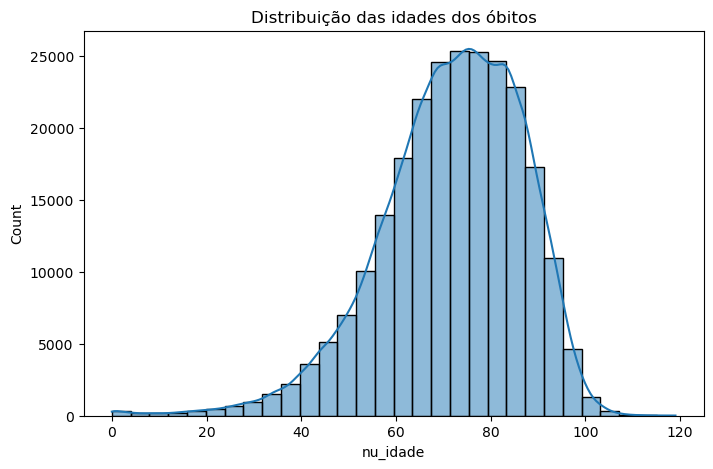

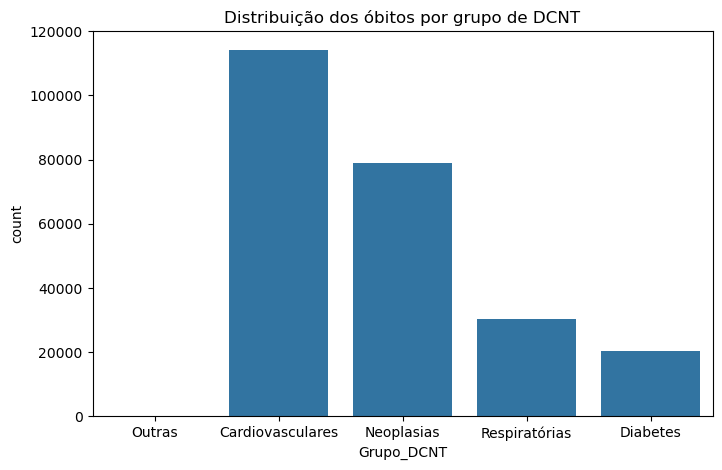

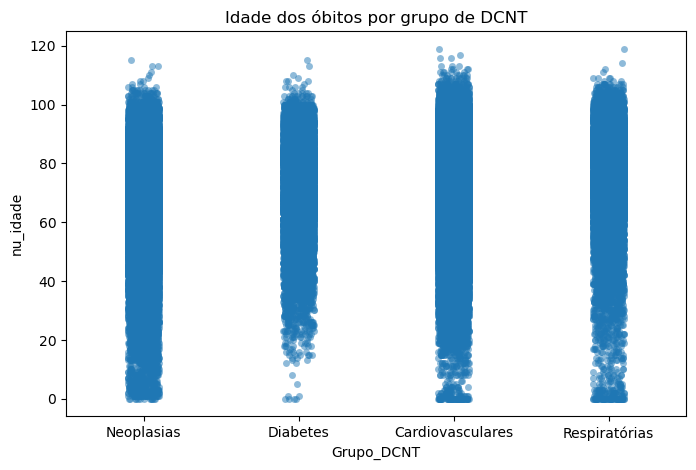

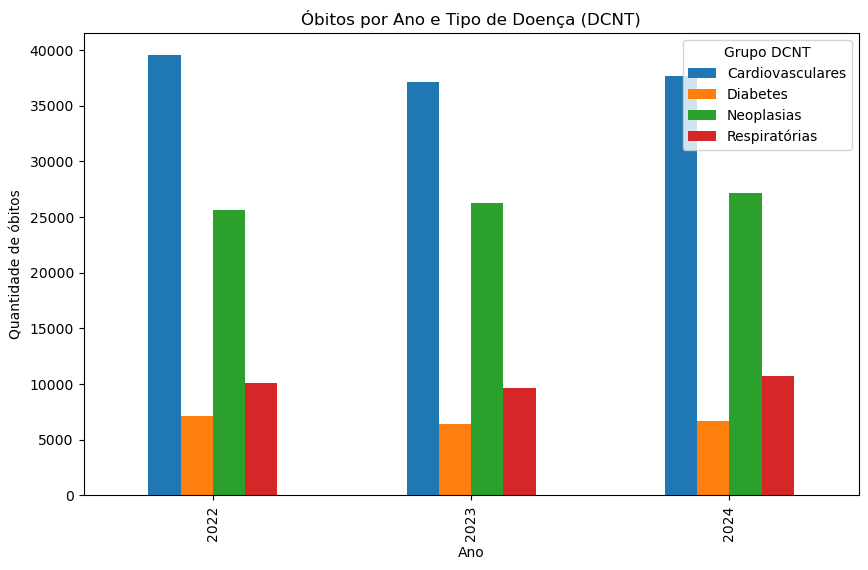

Grupo_DCNT  Cardiovasculares  Diabetes  Neoplasias  Respiratórias
Ano                                                              
2022                   39522      7117       25623          10047
2023                   37146      6422       26240           9637
2024                   37645      6698       27151          10692


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de idades
plt.figure(figsize=(8,5))
sns.histplot(combined_df["nu_idade"], bins=30, kde=True)
plt.title("Distribuição das idades dos óbitos")
plt.show()

# Óbitos por grupo de DCNT
plt.figure(figsize=(8,5))
sns.countplot(x="Grupo_DCNT", data=combined_df, order=df["Grupo_DCNT"].value_counts().index)
plt.title("Distribuição dos óbitos por grupo de DCNT")
plt.show()

# Dispersão idade x grupo
plt.figure(figsize=(8,5))
sns.stripplot(x="Grupo_DCNT", y="nu_idade", data=combined_df, alpha=0.5)
plt.title("Idade dos óbitos por grupo de DCNT")
plt.show()

# Relação entre os anos e o tipo de doença do óbito
tabela_pivot = pd.pivot_table(
    combined_df,
    values="dt_obito",
    index="Ano",
    columns="Grupo_DCNT",
    aggfunc="count",
    fill_value=0
)

tabela_pivot.plot(kind="bar", figsize=(10,6))
plt.title("Óbitos por Ano e Tipo de Doença (DCNT)")
plt.ylabel("Quantidade de óbitos")
plt.xlabel("Ano")
plt.legend(title="Grupo DCNT")
plt.show()
print(tabela_pivot)
